<a href="https://colab.research.google.com/github/CatAIGeek/prophet-challenge/blob/main/forecasting_net_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


                     Search Trends
Date                              
2020-05-01 00:00:00             80
2020-05-01 01:00:00             80
2020-05-01 02:00:00             76
2020-05-01 03:00:00             66
2020-05-01 04:00:00             53
...                            ...
2020-05-31 19:00:00             59
2020-05-31 20:00:00             64
2020-05-31 21:00:00             76
2020-05-31 22:00:00             90
2020-05-31 23:00:00             96

[744 rows x 1 columns]


<Axes: title={'center': 'Google Hourly Search Trends May 2020'}, xlabel='Date'>

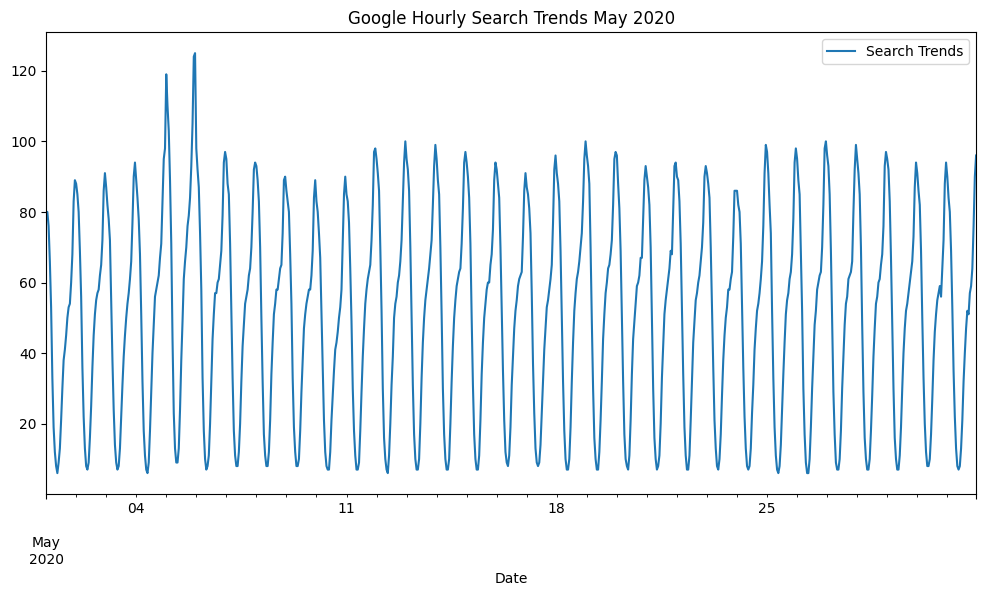

In [5]:
# Slice the DataFrame to just the month of May 2020
may_2020 = df_mercado_trends.loc["2020-05-01":"2020-05-31"]
print(may_2020)

# Plot to visualize the data for May 2020
may_2020.plot(figsize=(12, 6), title='Google Hourly Search Trends May 2020')


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
may_2020 = may_2020.sum()


# View the traffic_may_2020 value
print(may_2020)

Search Trends    38181
dtype: int64


In [7]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_search = df_mercado_trends.groupby(by=[df_mercado_trends.index.year,df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
print(monthly_search)

Search Trends    35172.5
dtype: float64


In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value

# Calculate the sum of the total search traffic for May 2020
may_2020_traffic = may_2020.sum()

# View the traffic for May 2020
print("Traffic for May 2020:", may_2020_traffic)

# Calculate the monthly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_search_median = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the monthly median traffic value
print("Monthly Median Traffic:", monthly_search_median)

# Compare May 2020 traffic to the monthly median traffic
comparison_ratio = may_2020_traffic / monthly_search_median
print("Comparison Ratio (May 2020 traffic / Monthly median traffic):", comparison_ratio)


Traffic for May 2020: 38181
Monthly Median Traffic: Search Trends    35172.5
dtype: float64
Comparison Ratio (May 2020 traffic / Monthly median traffic): Search Trends    1.085536
dtype: float64


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the Google search traffic increased during the month that MercadoLibre released it financial results.  The Traffic for May 2020 was     38,181, which is higher than the monthly median traffic of 35,172.5.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

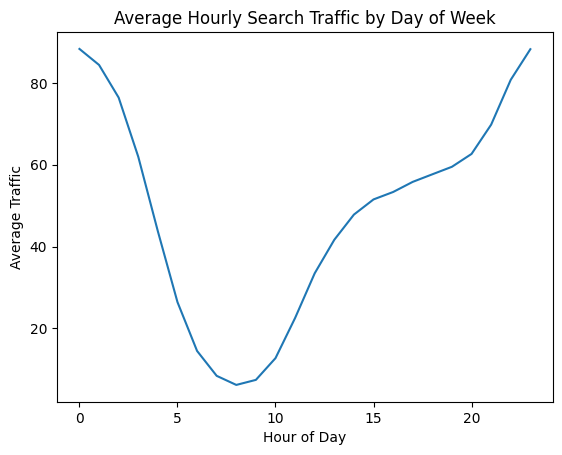

In [9]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
import matplotlib.pyplot as plt

hourly_average_traffic = df_mercado_trends.groupby([df_mercado_trends.index.hour]).mean()
title="Average Hourly Search Traffic by Day of Week"
plt.title(title)
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic")
plt.plot(hourly_average_traffic)
plt.show()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

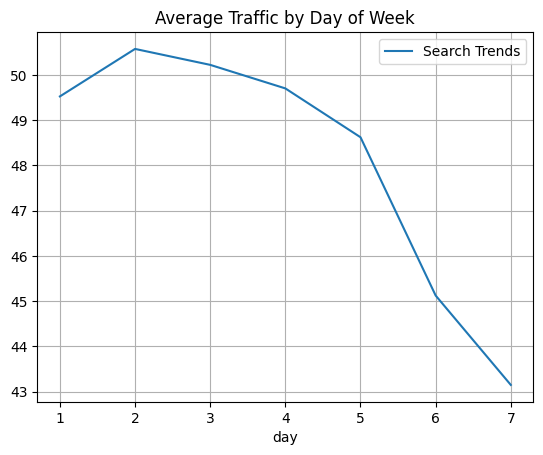

In [10]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
hourly_average_traffic = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().day]).mean()
hourly_average_traffic.plot(title='Average Traffic by Day of Week')
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

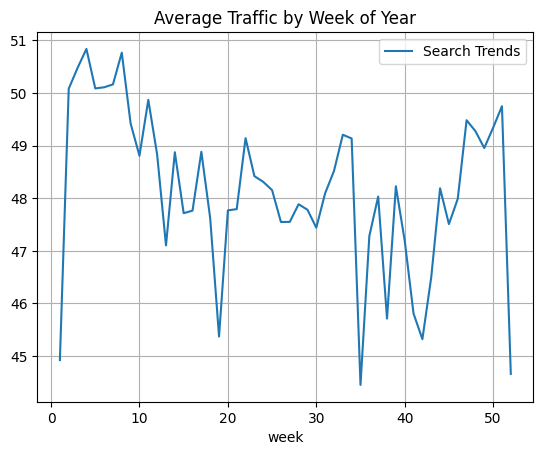

In [11]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
hourly_average_traffic = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().week]).mean().plot()
plt.title('Average Traffic by Week of Year')
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**  Search traffic starts increasing around 10 AM and continues to rise throughtout the day into the night, peaking at midnight. After midnight, it starts to decline again until it reaches it's lowest point before 10 AM. It also surges well above 50 on the second day of the week, then has a continued downward trend the rest of the week with the lowest point on the seventh day at slightly above 43.  In looking at the average traffic by week of the year: the beginning of the year, between the 1st and 10th week, it peaks the highest points - being well above 50. The lowest point is around week 35, hitting a low below 45; however, there is a constant upward and downward trend throughout the year in most other weeks. Interestingly enough, near the 52nd week, the trend is downward below 45.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


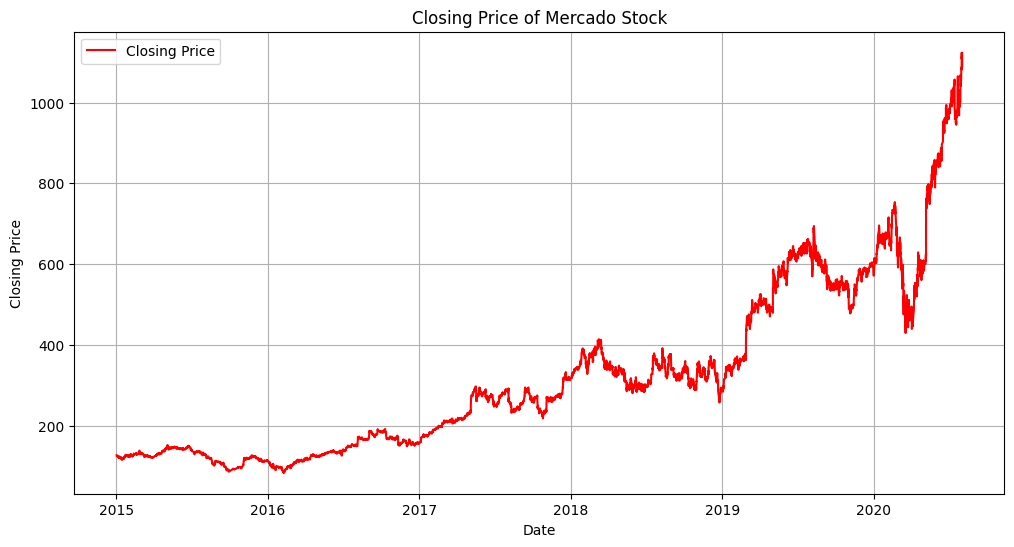

In [13]:
# Visualize the closing price of the df_mercado_stock DataFrame

# Plot the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], color='red', label='Closing Price')
plt.title('Closing Price of Mercado Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

# Concatenate the DataFrame by columns (axis=1)
combined_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)

# Drop any rows with only one column of data
combined_df = combined_df.dropna(thresh=2)

# Display the resulting DataFrame
print(combined_df.head())


# View the first and last five rows of the DataFrame
# View the first five rows of the DataFrame
print("First 5 rows of stock price data:")
print(df_mercado_stock.head())

# View the last five rows of the DataFrame
print("\nLast 5 rows of stock price data:")
print(df_mercado_stock.tail())



                      close  Search Trends
2016-06-01 09:00:00  135.16            6.0
2016-06-01 10:00:00  136.63           12.0
2016-06-01 11:00:00  136.56           22.0
2016-06-01 12:00:00  136.42           33.0
2016-06-01 13:00:00  136.10           40.0
First 5 rows of stock price data:
                      close
date                       
2015-01-02 09:00:00  127.67
2015-01-02 10:00:00  125.44
2015-01-02 11:00:00  125.57
2015-01-02 12:00:00  125.40
2015-01-02 13:00:00  125.17

Last 5 rows of stock price data:
                        close
date                         
2020-07-31 11:00:00  1105.780
2020-07-31 12:00:00  1087.925
2020-07-31 13:00:00  1095.800
2020-07-31 14:00:00  1110.650
2020-07-31 15:00:00  1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [15]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
# Slice the combined DataFrame to include only data from the first half of 2020
half_2020 = combined_df['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
print("First 5 rows of data in the first half of 2020:")
print(half_2020.head())
print("\nLast 5 rows of data in the first half of 2020:")
print(half_2020.tail())


First 5 rows of data in the first half of 2020:
                       close  Search Trends
2020-01-02 09:00:00  601.085            9.0
2020-01-02 10:00:00  601.290           14.0
2020-01-02 11:00:00  615.410           25.0
2020-01-02 12:00:00  611.400           37.0
2020-01-02 13:00:00  611.830           50.0

Last 5 rows of data in the first half of 2020:
                      close  Search Trends
2020-06-30 11:00:00  976.17           17.0
2020-06-30 12:00:00  977.50           27.0
2020-06-30 13:00:00  973.23           37.0
2020-06-30 14:00:00  976.50           45.0
2020-06-30 15:00:00  984.93           51.0


<Figure size 1200x600 with 0 Axes>

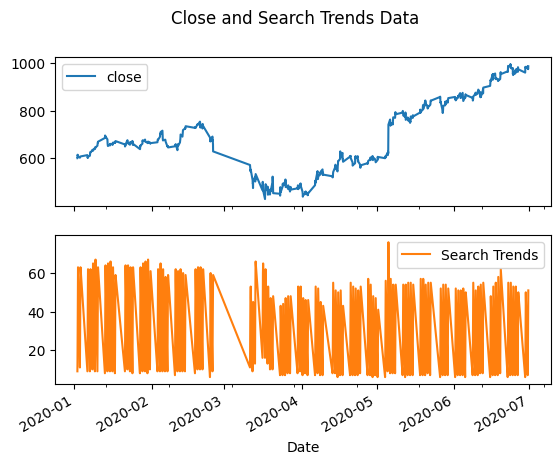

In [16]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
# Visualize the close and search trends data on separate axes
half_2020 = combined_df['2020-01':'2020-06']

# Plot the data from the first half of 2020
plt.figure(figsize=(12, 6))
half_2020.plot(subplots=True, title='Close and Search Trends Data')
plt.xlabel('Date')
plt.show()



##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Based on the time series indicators, there is a common trend that's consistent with this narrative. Both the "Close" and "Search Trends" data show a pretty consistent rate from 2020-01 through 2020-03, hovering in the 60's before taking a significant downward trend from 2020-03 through 2020-04. After this point they somewhat differ in the trends. Begins to start a slight upward climb, slowly closerto 2020-05, with a good and steady upward trend in 2020-06 with steady growth through 2020-07.  The "Search Trends" on the otherhand, after the drastic dip that takes place in 2020-03, it rebounds in 2020-04 and takes on a constant pattern that has it's highest peak in 2020-05 at almost 80, but otherwise remains pretty constant between 40 and 60.

In [17]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df = half_2020.copy()
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)

# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())



,close,Search Trends,Lagged Search Trends
2020-01-02 09:00:00,601.085,9.0,NaN
2020-01-02 10:00:00,601.290,14.0,9.0
2020-01-02 11:00:00,615.410,25.0,14.0
2020-01-02 12:00:00,611.400,37.0,25.0
2020-01-02 13:00:00,611.830,50.0,37.0


,close,Search Trends,Lagged Search Trends
2020-06-30 11:00:00,976.17,17.0,11.0
2020-06-30 12:00:00,977.50,27.0,17.0
2020-06-30 13:00:00,973.23,37.0,27.0
2020-06-30 14:00:00,976.50,45.0,37.0
2020-06-30 15:00:00,984.93,51.0,45.0


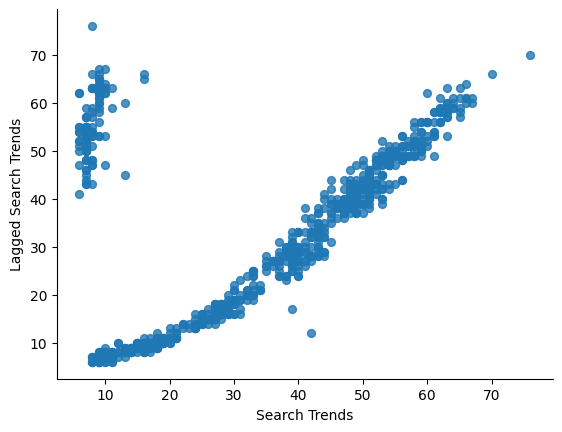

In [18]:
# @title Search Trends vs Lagged Search Trends

from matplotlib import pyplot as plt
mercado_stock_trends_df.plot(kind='scatter', x='Search Trends', y='Lagged Search Trends', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [19]:
# prompt: Using dataframe mercado_stock_trends_df:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a new column for the difference between close and lagged search trends
mercado_stock_trends_df['close_minus_lagged_search_trends'] = mercado_stock_trends_df['close'] - mercado_stock_trends_df['Lagged Search Trends']

# Fit a linear regression model to predict close price using search trends
model = LinearRegression()
model.fit(mercado_stock_trends_df[['Search Trends']], mercado_stock_trends_df['close'])

# Print

LinearRegression()

In [20]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].rolling(window=4).std()

# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())




,close,Search Trends,Lagged Search Trends,close_minus_lagged_search_trends,Stock Volatility
2020-01-02 09:00:00,601.085,9.0,NaN,NaN,NaN
2020-01-02 10:00:00,601.290,14.0,9.0,592.29,NaN
2020-01-02 11:00:00,615.410,25.0,14.0,601.41,NaN
2020-01-02 12:00:00,611.400,37.0,25.0,586.40,7.241739
2020-01-02 13:00:00,611.830,50.0,37.0,574.83,6.067396


,close,Search Trends,Lagged Search Trends,close_minus_lagged_search_trends,Stock Volatility
2020-06-30 11:00:00,976.17,17.0,11.0,965.17,3.382228
2020-06-30 12:00:00,977.50,27.0,17.0,960.50,3.528469
2020-06-30 13:00:00,973.23,37.0,27.0,946.23,2.375393
2020-06-30 14:00:00,976.50,45.0,37.0,939.50,1.835919
2020-06-30 15:00:00,984.93,51.0,45.0,939.93,4.942044


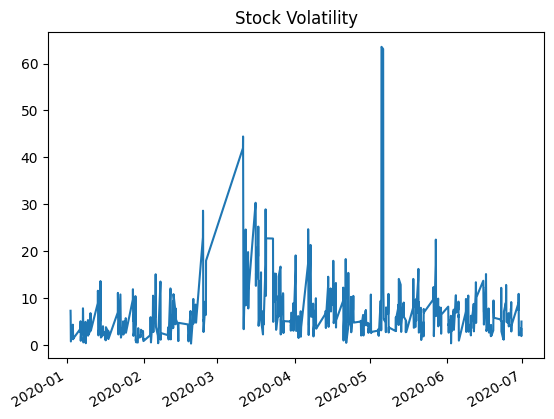

In [21]:
# Visualize the stock volatility
mercado_stock_trends_df['Stock Volatility'].plot(title='Stock Volatility')
plt.show()




**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

,close,Search Trends,Lagged Search Trends,close_minus_lagged_search_trends,Stock Volatility,Hourly Stock Return
2020-01-02 09:00:00,601.085,9.0,NaN,NaN,NaN,NaN
2020-01-02 10:00:00,601.290,14.0,9.0,592.29,NaN,0.000341
2020-01-02 11:00:00,615.410,25.0,14.0,601.41,NaN,0.023483
2020-01-02 12:00:00,611.400,37.0,25.0,586.40,7.241739,-0.006516
2020-01-02 13:00:00,611.830,50.0,37.0,574.83,6.067396,0.000703


,close,Search Trends,Lagged Search Trends,close_minus_lagged_search_trends,Stock Volatility,Hourly Stock Return
2020-06-30 11:00:00,976.17,17.0,11.0,965.17,3.382228,-0.002656
2020-06-30 12:00:00,977.50,27.0,17.0,960.50,3.528469,0.001362
2020-06-30 13:00:00,973.23,37.0,27.0,946.23,2.375393,-0.004368
2020-06-30 14:00:00,976.50,45.0,37.0,939.50,1.835919,0.003360
2020-06-30 15:00:00,984.93,51.0,45.0,939.93,4.942044,0.008633


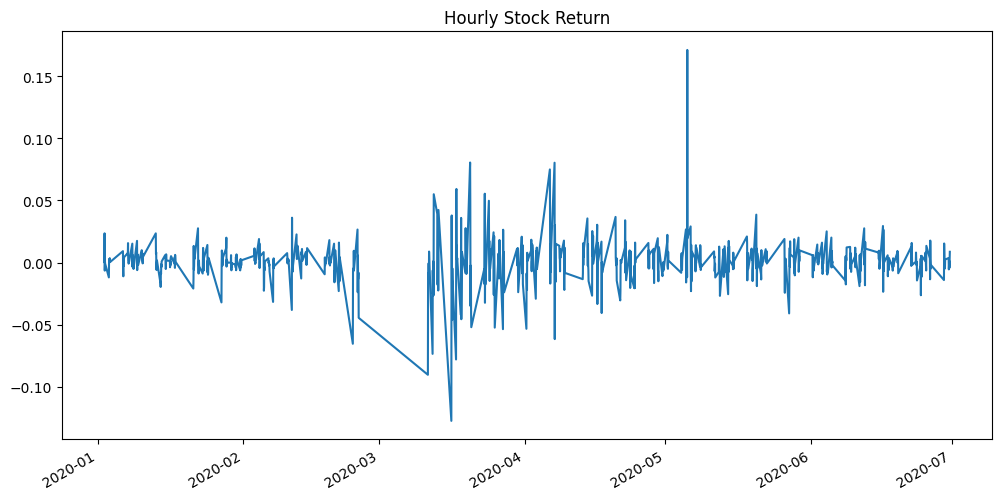

In [22]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()

# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

plt.figure(figsize=(12, 6))
mercado_stock_trends_df['Hourly Stock Return'].plot(title='Hourly Stock Return')
plt.show()

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [23]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.105609,0.034082
Lagged Search Trends,-0.105609,1.000000,-0.003399
Hourly Stock Return,0.034082,-0.003399,1.000000


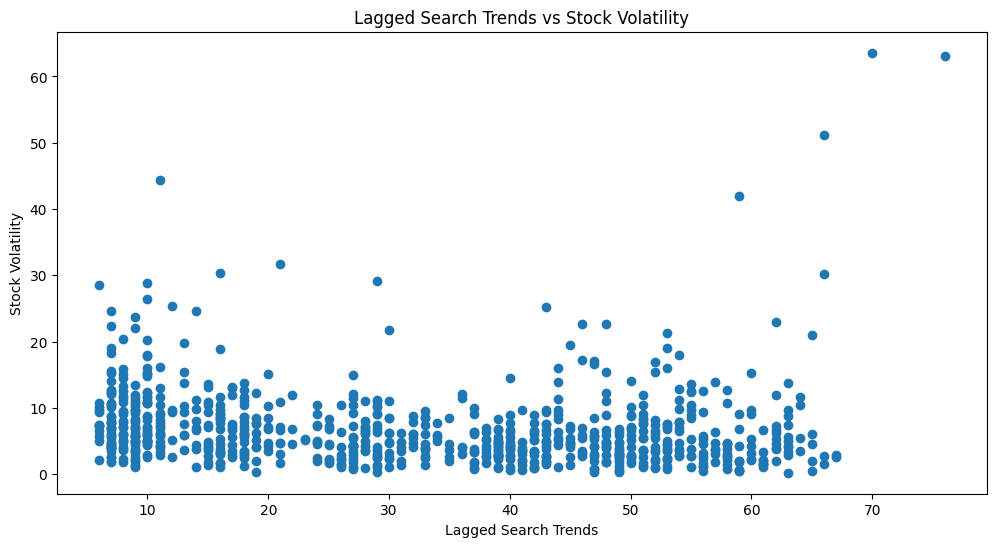

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(mercado_stock_trends_df['Lagged Search Trends'], mercado_stock_trends_df['Stock Volatility'])
plt.xlabel('Lagged Search Trends')
plt.ylabel('Stock Volatility')
plt.title('Lagged Search Trends vs Stock Volatility')
plt.show()


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
1. For "Stock Volatility and Lagged Search Trends": The correlation is -0.1056, which indicates a weak negative relationship. This suggests that there is a slight tendency for higher search trends to be associated with lower stock volatility, but the relationship is not strong.

2. For "Lagged Search Trends and Hourly Stock Return": The correlation is -0.0034, showing an almost negligible negative relationship. This implies that lagged search trends have very little to no predictive power regarding hourly stock returns.

Overall, the correlations suggest weak relationships among these variables. This means that, according to this data, lagged search trends and stock volatility have a minimal impact on hourly stock returns, and vice versa.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [25]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())




,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [26]:
# Call the Prophet function, store as an object
model = Prophet()



In [27]:
# Fit the time-series model.
model.fit(mercado_prophet_df)



DEBUG:cmdstanpy:input tempfile: /tmp/tmp840fcapk/4ads1r3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp840fcapk/6_tfp7l8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82558', 'data', 'file=/tmp/tmp840fcapk/4ads1r3t.json', 'init=/tmp/tmp840fcapk/6_tfp7l8.json', 'output', 'file=/tmp/tmp840fcapk/prophet_modelzrnw0low/prophet_model-20240724023435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:34:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [34]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,80.808043,97.814963,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.364363,94.413137,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,66.691870,83.601999,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,51.972006,67.907039,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.829131,51.728899,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

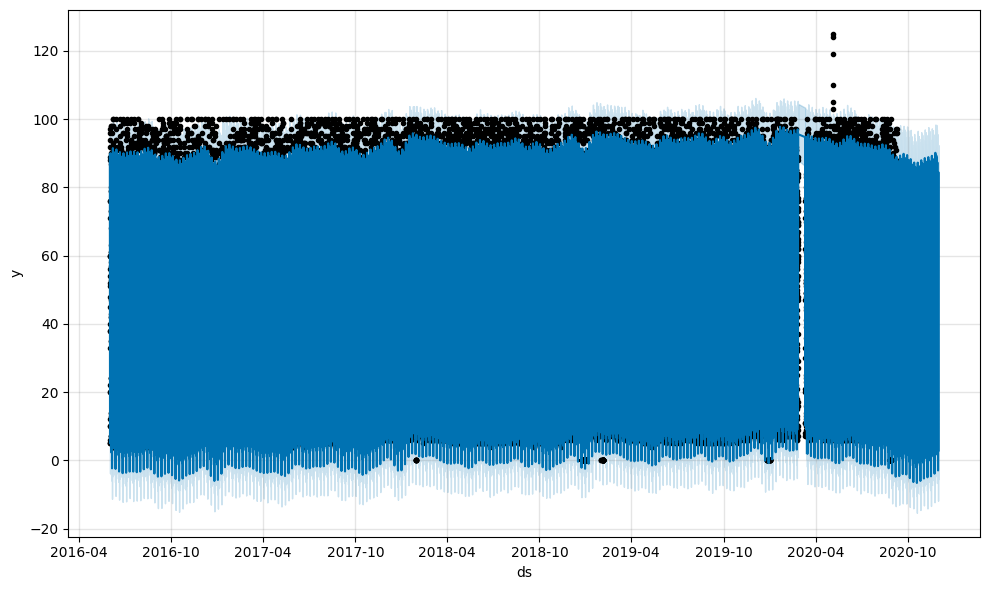

In [30]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_mercado_trends)
plt.show()



##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
Overall, the near-term forecast for MercadoLibre indicates a generally stable trend in popularity with significant fluctuations in the forecast range throughout the day. This suggests that while the underlying trend remains consistent, there are notable variations in popularity at different times. For example, the forecast range, the predicted range of popularity (yhat_lower to yhat_upper) varies throughout the day:

At 00:00, the forecast range is between 81.29 and 98.11.
At 01:00, it ranges from 77.52 to 94.12.
By 04:00, the range is between 36.11 and 52.54.
The variation in these ranges indicates that while the forecast trend is relatively stable, the popularity can fluctuate significantly during the day.

In looking at the daily, weekly, and yearly Components: The daily, weekly, and yearly terms, along with their lower and upper bounds, represent the effects of these time-based components. For the provided data, these values are mostly near zero, implying minimal influence from these factors.



#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [31]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]



,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.290459,98.105345
2016-06-01 01:00:00,86.075935,77.516403,94.119816
2016-06-01 02:00:00,75.753361,67.126682,84.142531
2016-06-01 03:00:00,60.487045,51.645557,68.391927
2016-06-01 04:00:00,43.373051,36.106415,52.543525
...,...,...,...
2020-11-30 04:00:00,39.781638,31.104396,47.982242
2020-11-30 05:00:00,24.310504,16.186945,32.228092
2020-11-30 06:00:00,12.344836,4.095698,20.620643


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

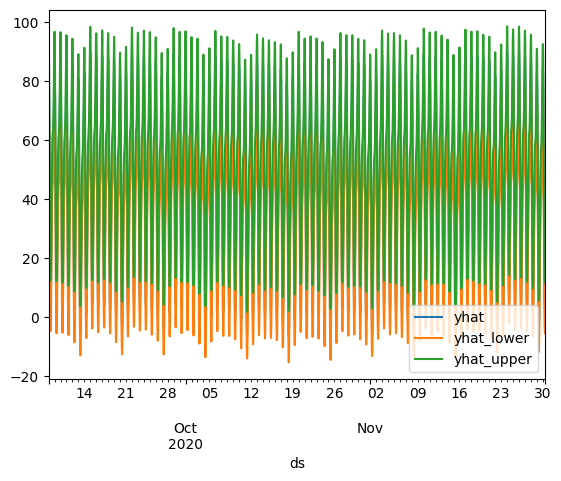

In [32]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].tail(2000).plot()
plt.show()


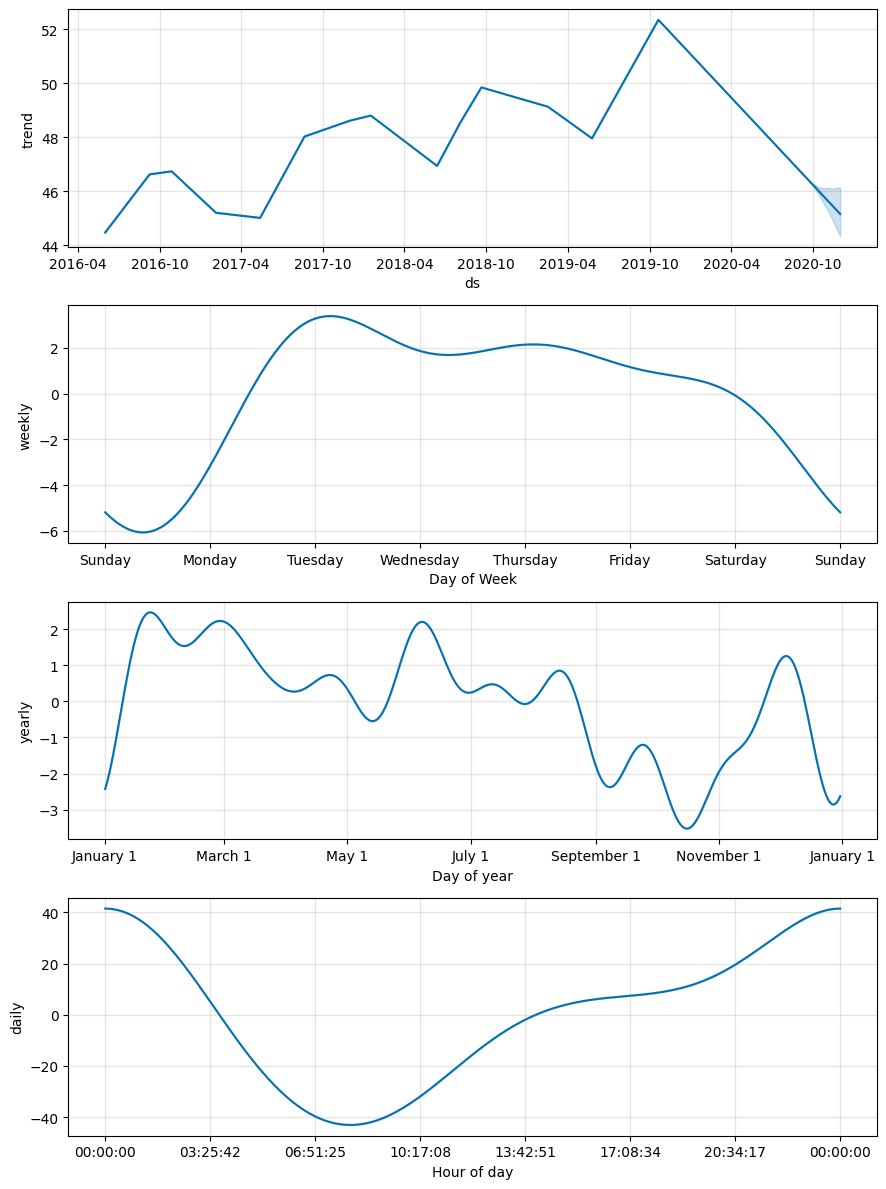

In [33]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
model.plot_components(forecast_mercado_trends)
plt.show()





##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Midnight is the time of day that exhibits the greatest popularity.

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday is the day of wekk that gets the most search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** A day in October (maybe Halloween) has the lowest point for search traffic.
